In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
client_id = '559efa2f1cff4143b8fdbb19e66caa01'
client_secret = '79b101ee26bd444f9cfb38899cff1bed'
client_credentials_manager = SpotifyClientCredentials('559efa2f1cff4143b8fdbb19e66caa01', '79b101ee26bd444f9cfb38899cff1bed')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [160]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids
ids = getTrackIDs('weichenglee', 'spotify:playlist:37i9dQZF1DWWOaP4H0w5b0')

#punk:https://open.spotify.com/playlist/37i9dQZF1DX3LDIBRoaCDQ?si=b7fa7bba1dc74aef
#rock: https://open.spotify.com/playlist/37i9dQZF1DXcmaoFmN75bi?si=b96e6b9872a143ab
#metal:https://open.spotify.com/playlist/37i9dQZF1DWWOaP4H0w5b0?si=9bedf2478fb94cca

In [84]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)
  name = meta['name']
  artist = meta['album']['artists'][0]['name']
  length = meta['duration_ms']
# features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  valence = features[0]['valence']
  track = [name, artist, length, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, key, mode, valence]
  return track

In [85]:
# loop
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)
track
# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'artist', 'length', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key', 'mode', 'valence'])
df.to_csv("metal_data.csv", sep = ',')

In [ ]:
######

In [152]:
df_r = pd.read_csv('rock_data.csv')
df_m = pd.read_csv('metal_data.csv')
df_p = pd.read_csv('punk_data.csv')

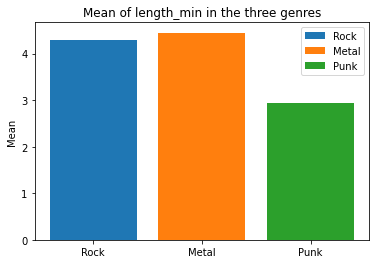

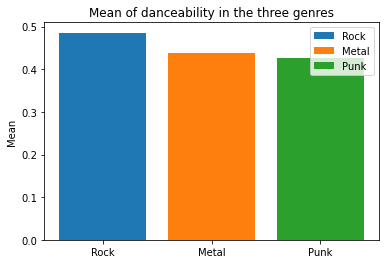

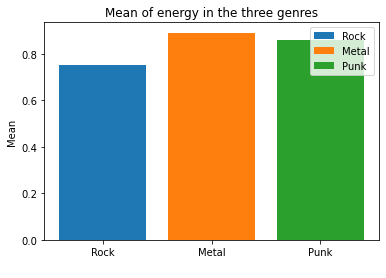

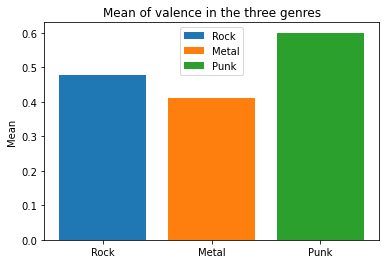

In [158]:
import matplotlib.pyplot as plt

# Define the columns to compare
columns = ['length_min', 'danceability', 'energy','valence']


# Calculate means for each column in each dataframe
means_r = df_r[columns].mean()
means_m = df_m[columns].mean()
means_p = df_p[columns].mean()

# Iterate over each column and create a separate bar chart
for col in columns:
    fig, ax = plt.subplots()
    ax.bar(['Rock'], means_r[col], label='Rock')
    ax.bar(['Metal'], means_m[col], label='Metal')
    ax.bar(['Punk'], means_p[col], label='Punk')
    ax.set_xlabel(' ')
    ax.set_ylabel('Mean')
    ax.set_title(f'Mean of {col} in the three genres')
    ax.legend()
    plt.show()


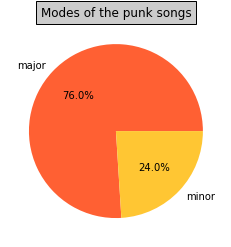

In [136]:
import matplotlib.pyplot as plt

# get the frequency of each value in the "mode" column
mode_counts = df_p["mode"].value_counts()
#change the label name
modes = {1:"major", 0:"minor"}
mode_counts.index = [modes[i] for i in mode_counts.index]
# create the pie chart
colors = ["#FF6033", "#FFC633"]
plt.pie(mode_counts, labels=mode_counts.index,autopct='%.1f%%', colors=colors)
plt.title("Modes of the punk songs", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

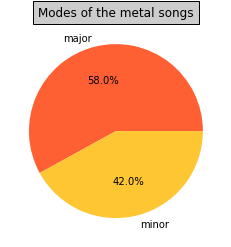

In [134]:
# get the frequency of each value in the "mode" column
mode_counts = df_m["mode"].value_counts()
#change the label name
modes = {1:"major", 0:"minor"}
mode_counts.index = [modes[i] for i in mode_counts.index]
# create the pie chart
colors = ["#FF6033", "#FFC633"]
plt.pie(mode_counts, labels=mode_counts.index,autopct='%.1f%%', colors=colors)
plt.title("Modes of the metal songs", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

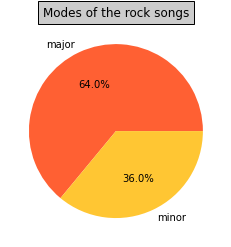

In [135]:
# get the frequency of each value in the "mode" column
mode_counts = df_r["mode"].value_counts()
#change the label name
modes = {1:"major", 0:"minor"}
mode_counts.index = [modes[i] for i in mode_counts.index]
# create the pie chart
colors = ["#FF6033", "#FFC633"]
plt.pie(mode_counts, labels=mode_counts.index,autopct='%.1f%%', colors=colors)
plt.title("Modes of the rock songs", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [159]:
import seaborn as sns


In [106]:
df_r['valence'].describe()

count    100.000000
mean       0.478119
std        0.240844
min        0.036700
25%        0.301250
50%        0.468500
75%        0.702250
max        0.964000
Name: valence, dtype: float64

In [107]:
df_p['valence'].describe()

count    100.000000
mean       0.600924
std        0.238140
min        0.075400
25%        0.422250
50%        0.632500
75%        0.781500
max        0.977000
Name: valence, dtype: float64

In [108]:
df_m['valence'].describe()

count    100.000000
mean       0.411462
std        0.203068
min        0.037900
25%        0.270250
50%        0.416000
75%        0.552250
max        0.924000
Name: valence, dtype: float64

In [112]:
df_m['tempo'].describe()

count    100.000000
mean     122.600820
std       26.504644
min       67.197000
25%      102.919500
50%      124.163000
75%      137.801750
max      191.014000
Name: tempo, dtype: float64

In [113]:
df_r['tempo'].describe()

count    100.000000
mean     126.146240
std       29.208713
min       73.543000
25%      106.351750
50%      123.110000
75%      144.118000
max      188.386000
Name: tempo, dtype: float64

In [114]:
df_p['tempo'].describe()

count    100.000000
mean     134.736120
std       32.607993
min       75.824000
25%      104.686750
50%      139.235000
75%      160.767000
max      205.390000
Name: tempo, dtype: float64

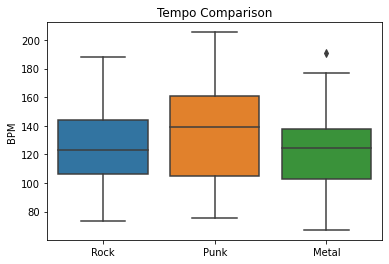

In [145]:
df_r['dataframe'] = 'df_r'
df_p['dataframe'] = 'df_p'
df_m['dataframe'] = 'df_m'
df = pd.concat([df_r, df_p, df_m])
ax = sns.boxplot(data=df, x='dataframe', y='tempo')
ax.set_xticklabels(['Rock', 'Punk', 'Metal'])
ax.set_title('Tempo Comparison')
ax.set_xlabel('')
ax.set_ylabel('BPM')
plt.show()

In [155]:
df_p['length_min'].describe()

count    100.000000
mean       2.938209
std        1.173911
min        0.752667
25%        2.265600
50%        2.772333
75%        3.423163
max       10.640433
Name: length_min, dtype: float64

In [156]:
df_m['length_min'].describe()

count    100.000000
mean       4.447578
std        1.310815
min        2.464000
25%        3.691496
50%        4.236567
75%        4.893396
max       11.260883
Name: length_min, dtype: float64

In [157]:
df_r['length_min'].describe()

count    100.000000
mean       4.289759
std        1.188194
min        2.019333
25%        3.556108
50%        4.033100
75%        4.855546
max        9.118433
Name: length_min, dtype: float64